## Capstone Research Project
### *Using Handwriting Features to Predict Student Performance in IT and Engineering Domain*

#### *Candidate:* Naira Khachatryan
#### *Coordinator:* Suren Khachatryan
#### *Program Chair:* Habet Madoyan

##### American University of Armenia
##### May 19, 2022

In [6]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as s
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# 1st stage
# Model design based on AUA Students Artificial Intelligence Midterm Exam Results (50 samples)

### Exploratory Data Analysis and Data Preprocessing

In [ ]:
data = pd.read_csv("/content/Capstone dataset 1_midterm exam  50 samples.csv")

In [ ]:
data.head()

,Student ID,Image ID,T_Bar Height,T_Bar character,Letter Size,Letter Size characteristic,Baseline,B_characteristic,Slant,S_characteristic,Grade,Letter grade,Pass no pass 60
0,S1,I1,middle,moderate self-esteem,middle,normal desire to be noticed,straight,balanced,straight,"rational, and very independent emotionally and...",60.70,D-,P
1,S2,I2,low,low self-esteem,small,prefers not to be noticed,ascending,optimistic,straight,"rational, and very independent emotionally and...",75.80,C,P
2,S3,I3,low,low self-esteem,middle,normal desire to be noticed,straight,balanced,right,"expressiveness, freedom in thought and emotion...",48.55,F,NP
3,S4,I4,middle,moderate self-esteem,middle,normal desire to be noticed,straight,balanced,right,"expressiveness, freedom in thought and emotion...",60.20,D-,P
4,S5,I5,high,high self-esteem,middle,normal desire to be noticed,ascending,optimistic,straight,"rational, and very independent emotionally and...",43.00,F,NP


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student ID                  50 non-null     object 
 1   Image ID                    50 non-null     object 
 2   T_Bar Height                50 non-null     object 
 3   T_Bar character             50 non-null     object 
 4   Letter Size                 50 non-null     object 
 5   Letter Size characteristic  50 non-null     object 
 6   Baseline                    50 non-null     object 
 7   B_characteristic            50 non-null     object 
 8   Slant                       50 non-null     object 
 9   S_characteristic            50 non-null     object 
 10  Grade                       50 non-null     float64
 11  Letter grade                50 non-null     object 
 12  Pass no pass 60             50 non-null     object 
dtypes: float64(1), object(12)
memory usag

In [ ]:
data.shape

(50, 13)

In [ ]:
data.describe()

,Grade
count,50.000000
mean,48.123000
std,18.344674
min,8.250000
25%,34.762500
50%,49.200000
75%,59.925000
max,85.100000


In [ ]:
data.columns

Index(['Student ID', 'Image ID', 'T_Bar Height', 'T_Bar character',
       'Letter Size', 'Letter Size characteristic', 'Baseline',
       'B_characteristic', 'Slant', 'S_characteristic', 'Grade',
       'Letter grade', 'Pass no pass 60'],
      dtype='object')

In [ ]:
data.isna().sum()

Student ID                    0
Image ID                      0
T_Bar Height                  0
T_Bar character               0
Letter Size                   0
Letter Size characteristic    0
Baseline                      0
B_characteristic              0
Slant                         0
S_characteristic              0
Grade                         0
Letter grade                  0
Pass no pass 60               0
dtype: int64

In [ ]:
#making categorical data columns numerical
data_num = data.copy()
data_num["T_Bar Height"] = LabelEncoder().fit_transform(data_num["T_Bar Height"])
data_num["Letter Size"] = LabelEncoder().fit_transform(data_num["Letter Size"])
data_num["Baseline"] = LabelEncoder().fit_transform(data_num["Baseline"])
data_num["Slant"] = LabelEncoder().fit_transform(data_num["Slant"])
data_num["Pass no pass 60"] = LabelEncoder().fit_transform(data_num["Pass no pass 60"])
data_num["Letter grade"] = LabelEncoder().fit_transform(data_num["Letter grade"])



In [ ]:
# bringing all columns to the same datatype and dropping non-numeric columns
for i in data_num:
  if type(data_num[i][0]) == str:
    data_num.drop(i, axis='columns', inplace = True)
  elif type(data_num[i][0]) == np.float or type(data_num[i][0]) == np.int:
    data_num[i] = data_num[i].astype("int64")
  else:
    continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
data_num.head()

,T_Bar Height,Letter Size,Baseline,Slant,Grade,Letter grade,Pass no pass 60
0,2,1,2,4,60.70,6,1
1,1,2,0,4,75.80,1,1
2,1,1,2,3,48.55,7,0
3,2,1,2,3,60.20,6,1
4,0,1,0,4,43.00,7,0


In [ ]:
# Pearson correlation matrix to figure out how different features are correlated
corr = data_num.corr()
corr.style.background_gradient()

,T_Bar Height,Letter Size,Baseline,Slant,Grade,Letter grade,Pass no pass 60
T_Bar Height,1.000000,0.153869,-0.031653,0.046832,-0.247520,0.102509,-0.102862
Letter Size,0.153869,1.000000,-0.080903,0.291143,-0.029209,0.061408,-0.097332
Baseline,-0.031653,-0.080903,1.000000,0.046388,0.174230,-0.048097,0.046539
Slant,0.046832,0.291143,0.046388,1.000000,-0.087405,0.260925,-0.150827
Grade,-0.247520,-0.029209,0.174230,-0.087405,1.000000,-0.727223,0.735540
Letter grade,0.102509,0.061408,-0.048097,0.260925,-0.727223,1.000000,-0.775114
Pass no pass 60,-0.102862,-0.097332,0.046539,-0.150827,0.735540,-0.775114,1.000000


Text(0.5, 1.0, 'Letter grade Distribution')

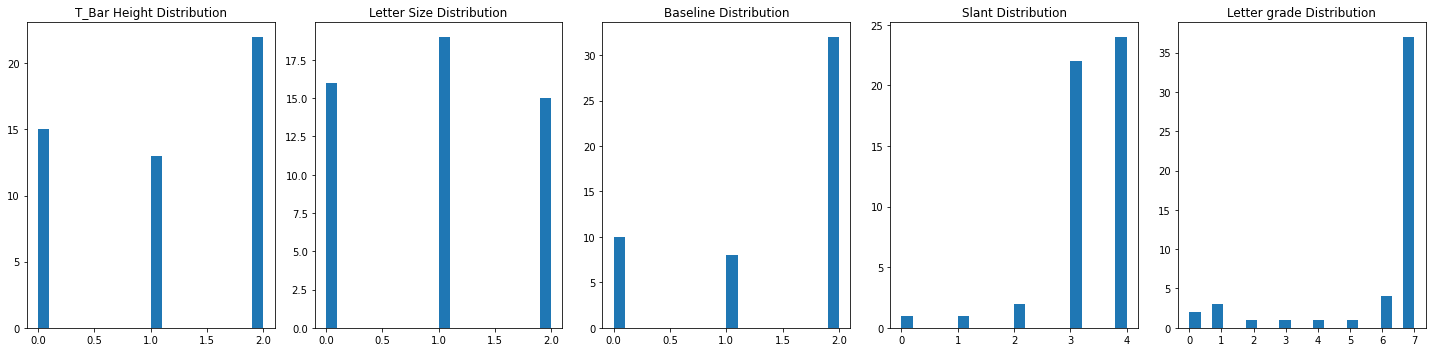

In [ ]:
# Plotting the dirstribution of datapoints by category to detect imbalance or outliers

fig, axs = plt.subplots(1, 5, tight_layout=True, figsize=(20, 5))
n_bins = 20

axs[0].hist(data_num["T_Bar Height"], bins=n_bins)
axs[0].set_title('T_Bar Height Distribution')
axs[1].hist(data_num['Letter Size'], bins=n_bins)
axs[1].set_title('Letter Size Distribution')
axs[2].hist(data_num['Baseline'], bins=n_bins)
axs[2].set_title('Baseline Distribution')
axs[3].hist(data_num['Slant'], bins=n_bins)
axs[3].set_title('Slant Distribution')
axs[4].hist(data_num['Letter grade'], bins=n_bins)
axs[4].set_title('Letter grade Distribution')

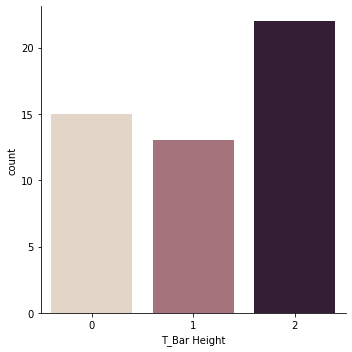

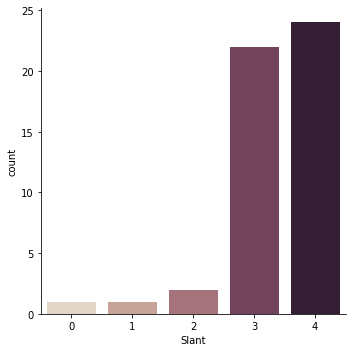

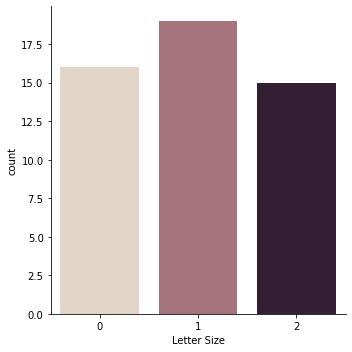

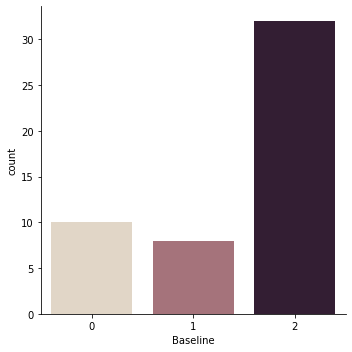

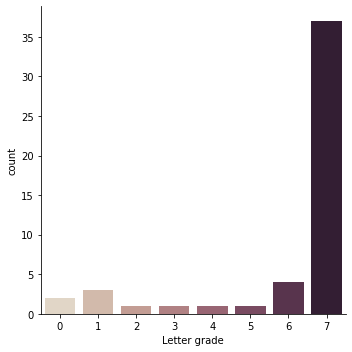

In [ ]:
# Plotting the dirstribution of datapoints by category to detect imbalance or outliers

sns.catplot(x = "T_Bar Height", kind="count", palette="ch:.25", data = data_num)
sns.catplot(x="Slant", kind="count", palette="ch:.25", data=data_num )
sns.catplot( x="Letter Size", kind="count", palette="ch:.25", data=data_num)
sns.catplot( x="Baseline", kind="count", palette="ch:.25", data=data_num)
sns.catplot( x="Letter grade", kind="count", palette="ch:.25", data=data_num)


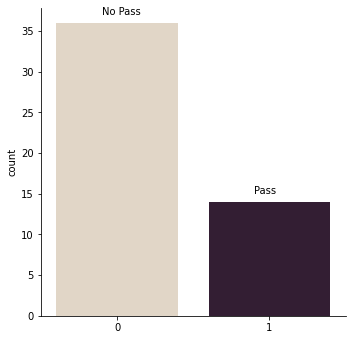

In [ ]:
# distribution of studnets who passed/ didn't pass the midterm 
sns.catplot( x="Pass no pass 60", kind="count", palette="ch:.25", data=data_num)
plt.text(-0.1,37,"No Pass")
plt.text(0.9,15,"Pass")
plt.xlabel("")
plt.show()



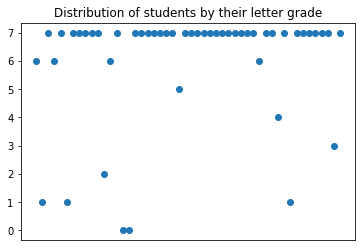

In [ ]:
# Letter grade distribution
plt.scatter(x = data["Student ID"], y = data_num["Letter grade"])
plt.xticks([])
plt.title("Distribution of students by their letter grade")
plt.show()

### Letter Grade predicition models

#### Train Test Split

In [ ]:
# creating a dataframe of features
features = data_num.iloc[:,0:4]
features.head()

,T_Bar Height,Letter Size,Baseline,Slant
0,2,1,2,4
1,1,2,0,4
2,1,1,2,3
3,2,1,2,3
4,0,1,0,4


In [ ]:
# all 4 characteristics together
X_train, X_test, y_train, y_test = train_test_split( features, data_num["Letter grade"], test_size=0.2, random_state=42)

In [ ]:
# to train model only based in slant
X_train, X_test, y_train, y_test = train_test_split( features[["Slant"]], data_num["Letter grade"], test_size=0.2, random_state=42)

In [ ]:
# to train model only based in Baseline
X_train, X_test, y_train, y_test = train_test_split( features[["Baseline"]], data_num["Letter grade"], test_size=0.2, random_state=42)

In [ ]:
# to train model only based in T_bar height
X_train, X_test, y_train, y_test = train_test_split( features[["T_Bar Height"]], data_num["Letter grade"], test_size=0.2, random_state=42)

In [ ]:
# to train model only based in T_bar height
X_train, X_test, y_train, y_test = train_test_split( features[["Letter Size"]], data_num["Letter grade"], test_size=0.2, random_state=42)

#### MLP for Letter Grade prediction

In [ ]:
hidden_layer_sizes = [2,(2,3),3,(3,4),5,(6,5),7,(8,2),9,(10,2),15,(20,2)]
max_iter = [10, 15, 20, 30, 50, 100]
activation = ["relu", "tanh", "logistic", "identity"]
solver = ["sgd", "adam"]

MLP_results = []

for layer in hidden_layer_sizes:
  for iter in max_iter:
    for act in activation:
      for s in solver:
        classifier = MLPClassifier(hidden_layer_sizes = layer,
                      max_iter = iter,
                      activation = act,
                      solver = s,
                      verbose = False,
                      early_stopping = False,
                      random_state = 7)
        classifier.fit(X_train, y_train)
        predicitons = classifier.predict(X_test)
        tsscore = np.round(metrics.accuracy_score(y_test, predicitons),4)
        predicitons1 = classifier.predict(X_train)
        trscore = np.round(metrics.accuracy_score(y_train, predicitons1),4)
        f1 = metrics.f1_score(y_test, predicitons,average='weighted')
        loss = classifier.loss_

        MLP_results.append([layer, iter, act, s, tsscore, trscore, f1, loss])
      

In [ ]:
MLP_results_df = pd.DataFrame(MLP_results)
MLP_results_df.columns =['Hidden Layer Sizes', 'Max Iter.', 'Activation', 'Solver', "TS Accuracy", "TR Accuracy", "F1", "Loss"]
MLP_results_df.sort_values(by = ["TS Accuracy","TR Accuracy", "F1"], inplace = True, ascending = False)
MLP_results_df

,Hidden Layer Sizes,Max Iter.,Activation,Solver,TS Accuracy,TR Accuracy,F1,Loss
308,7,20,logistic,sgd,0.8,0.750,0.711111,1.604336
318,7,30,identity,sgd,0.8,0.750,0.711111,1.171569
4,2,10,logistic,sgd,0.8,0.725,0.711111,1.502498
12,2,15,logistic,sgd,0.8,0.725,0.711111,1.487558
13,2,15,logistic,adam,0.8,0.725,0.711111,1.487923
...,...,...,...,...,...,...,...,...
555,"(20, 2)",30,tanh,adam,0.0,0.025,0.000000,2.309303
562,"(20, 2)",50,tanh,sgd,0.0,0.025,0.000000,2.078879
432,"(10, 2)",10,relu,sgd,0.0,0.000,0.000000,1.814869
433,"(10, 2)",10,relu,adam,0.0,0.000,0.000000,1.867947


In [ ]:
MLP_results_df.describe()

,Max Iter.,TS Accuracy,TR Accuracy,F1,Loss
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,37.500000,0.394444,0.378993,0.369059,1.706690
std,30.815016,0.374682,0.302089,0.336310,0.483672
min,10.000000,0.000000,0.000000,0.000000,0.970438
25%,15.000000,0.000000,0.075000,0.000000,1.348252
50%,25.000000,0.450000,0.325000,0.533333,1.653485
75%,50.000000,0.800000,0.725000,0.711111,1.991789
max,100.000000,0.800000,0.750000,0.752941,3.581242


The MLP maximum accuracy for all features is 0.71

MLP best accuracy on T_bar height is 0.8

#### Logitstic Regression for Letter Grade prediciton

In [ ]:
from sklearn.linear_model import LogisticRegression
penalty =  "l2"
solver = ['newton-cg', 'lbfgs', 'liblinear']
Logistic_Results = []

for s in solver:
    Logistic_model = LogisticRegression(penalty = penalty, solver = s)
    Logistic_model.fit(X_train, y_train)
    predictions = Logistic_model.predict(X_test)
    score = Logistic_model.score(X_test, y_test)
    #f1 = metrics.f1_score(y_test, predictions)
    Logistic_Results.append([s, penalty, score])



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
Logistic_Results = pd.DataFrame(Logistic_Results)
Logistic_Results.columns = ["Solver", "Penalty", "Accuracy score"]
Logistic_Results

,Solver,Penalty,Accuracy score
0,newton-cg,l2,0.8
1,lbfgs,l2,0.8
2,liblinear,l2,0.8
3,sag,l2,0.8
4,saga,l2,0.8


For all features, with all models, accuracy - 0.8

Also for Slant only, Baseline only, Letter Size only, T-Bar only

#### Support vector Classification for Letter Grade prediction

In [ ]:
from sklearn.svm import SVC as SVC
SVC_model = SVC(kernel = "linear", C = 1, gamma = "scale")
SVC_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [ ]:
SVC_model.score(X_test, y_test)

0.8

In [ ]:
SVC_model.score(X_train, y_train)

0.75

For all features accuracy - 0.8

Also for Slant only, Baseline only, Letter Size only, T-Bar only

#### Random Forest Classifier for Letter Grade prediction

In [ ]:
n_estimators = [2,3,4,5,6,7]
criterion = ["gini", "entropy"]
RF_Results = []

for n in n_estimators:
  for c in criterion:

      RF_model = RandomForestClassifier(n_estimators=n,criterion=c,n_jobs = -1, random_state = 0) 
      RF_model.fit(X_train, y_train)
      predictions = RF_model.predict(X_test)
      score = RF_model.score(X_test, y_test) #Return the mean accuracy on the given test data and labels.
      RF_Results.append([n, c, score])



In [ ]:
RF_Results = pd.DataFrame(RF_Results)
RF_Results.columns = ["Number of Estimatoras", "Criterion", "Accuracy score"]

In [ ]:
RF_Results.describe()

,Number of Estimatoras,Accuracy score
count,12.000000,12.000000
mean,4.166667,0.533333
std,3.040136,0.149747
min,1.000000,0.200000
25%,2.000000,0.475000
50%,3.500000,0.550000
75%,5.000000,0.625000
max,10.000000,0.700000


For all features accuracy  0.7

 for Slant only it became 0.8

 Baseline only - 0.8 all models, Letter Size only, T-Bar only too

### Pass/ No Pass prediction model

In [ ]:
# all 4 characteristics together
X_train, X_test, y_train, y_test = train_test_split( features, data_num["Pass no pass 60"], test_size=0.2, random_state=42)

#### MLP for Pass/No Pass prediction

In [ ]:
hidden_layer_sizes = [2,(2,3),3,(3,4),5,(6,5),7,(8,2),9,(10,2),15,(20,2)]
max_iter = [10, 15, 20, 30, 50, 100]
activation = ["relu", "tanh", "logistic", "identity"]
solver = ["sgd", "adam"]

MLP_results = []

for layer in hidden_layer_sizes:
  for iter in max_iter:
    for act in activation:
      for s in solver:
        classifier = MLPClassifier(hidden_layer_sizes = layer,
                      max_iter = iter,
                      activation = act,
                      solver = s,
                      verbose = False,
                      early_stopping = False,
                      random_state = 7)
        classifier.fit(X_train, y_train)
        predicitons = classifier.predict(X_test)
        tsscore = np.round(metrics.accuracy_score(y_test, predicitons),4)
        predicitons1 = classifier.predict(X_train)
        trscore = np.round(metrics.accuracy_score(y_train, predicitons1),4)
        f1 = metrics.f1_score(y_test, predicitons,average='weighted')
        loss = classifier.loss_

        MLP_results.append([layer, iter, act, s, tsscore, trscore, f1, loss])
      

In [ ]:
MLP_results_df = pd.DataFrame(MLP_results)
MLP_results_df.columns =['Hidden Layer Sizes', 'Max Iter.', 'Activation', 'Solver', "TS Accuracy", "TR Accuracy", "F1", "Loss"]
MLP_results_df.sort_values(by = ["TS Accuracy","TR Accuracy", "F1"], inplace = True, ascending = False)
MLP_results_df

,Hidden Layer Sizes,Max Iter.,Activation,Solver,TS Accuracy,TR Accuracy,F1,Loss
508,15,30,logistic,sgd,0.9,0.600,0.886275,0.682743
411,9,30,tanh,adam,0.9,0.575,0.886275,0.678959
402,9,20,tanh,sgd,0.9,0.475,0.886275,0.697745
41,2,100,relu,adam,0.8,0.750,0.711111,0.616899
2,2,10,tanh,sgd,0.8,0.725,0.711111,0.602425
...,...,...,...,...,...,...,...,...
492,15,15,logistic,sgd,0.2,0.275,0.066667,0.717118
543,"(20, 2)",15,identity,adam,0.2,0.275,0.066667,1.473890
551,"(20, 2)",20,identity,adam,0.2,0.275,0.066667,1.241179
366,"(8, 2)",30,identity,sgd,0.1,0.350,0.036364,0.801098


In [ ]:
MLP_results_df.describe()

,Max Iter.,TS Accuracy,TR Accuracy,F1,Loss
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,37.500000,0.560937,0.529340,0.491130,0.757234
std,30.815016,0.262268,0.175767,0.293919,0.206913
min,10.000000,0.100000,0.275000,0.036364,0.582255
25%,15.000000,0.200000,0.300000,0.066667,0.635118
50%,25.000000,0.700000,0.600000,0.658824,0.694750
75%,50.000000,0.800000,0.700000,0.711111,0.782260
max,100.000000,0.900000,0.750000,0.886275,1.820251


On all features this lands 0.88 F1 score and 0.9 accuracy score.


On T bar Height the accuracy socre becomes 0.8 and the F1 score is 0.71

#### Logistic Regression for Pass/No Pass prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
penalty =  "l2"
solver = ['newton-cg', 'lbfgs', 'liblinear']
Logistic_Results = []

for s in solver:
    Logistic_model = LogisticRegression(penalty = penalty, solver = s)
    Logistic_model.fit(X_train, y_train)
    predictions = Logistic_model.predict(X_test)
    score = Logistic_model.score(X_test, y_test)
    #f1 = metrics.f1_score(y_test, predictions)
    Logistic_Results.append([s, penalty, score])



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
Logistic_Results = pd.DataFrame(Logistic_Results)
Logistic_Results.columns = ["Solver", "Penalty", "Accuracy score"]
Logistic_Results

,Solver,Penalty,Accuracy score
0,newton-cg,l2,0.8
1,lbfgs,l2,0.8
2,liblinear,l2,0.8
3,sag,l2,0.8
4,saga,l2,0.8


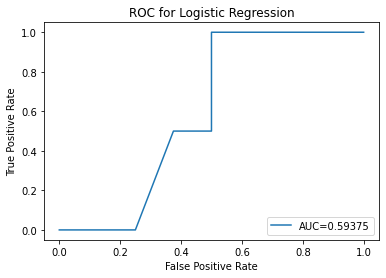

In [ ]:
#define metrics
y_pred_proba = Logistic_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC for Logistic Regression")
plt.legend(loc=4)
plt.show()

#### SVC for Pass/No Pass prediction

In [ ]:
from sklearn.svm import SVC as SVC
SVC_model = SVC(kernel = "linear", C = 1, gamma = "scale", probability = True)
SVC_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', probability=True)

In [ ]:
SVC_model.score(X_test, y_test)

0.8

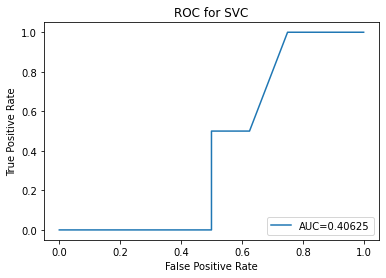

In [ ]:
#define metrics
y_pred_proba = SVC_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC for SVC")
plt.legend(loc=4)
plt.show()

#### Random Forest for Pass/No Pass prediction

In [ ]:
n_estimators = [2,3,4,5,6,7]
criterion = ["gini", "entropy"]
RF_Results = []

for n in n_estimators:
  for c in criterion:

      RF_model = RandomForestClassifier(n_estimators=n,criterion=c,n_jobs = -1, random_state = 0) 
      RF_model.fit(X_train, y_train)
      predictions = RF_model.predict(X_test)
      score = RF_model.score(X_test, y_test) #Return the mean accuracy on the given test data and labels.
      RF_Results.append([n, c, score])



In [ ]:
RF_Results = pd.DataFrame(RF_Results)
RF_Results.columns = ["Number of Estimatoras", "Criterion", "Accuracy score"]

In [ ]:
RF_Results


,Number of Estimatoras,Criterion,Accuracy score
0,1,gini,0.8
1,1,entropy,0.8
2,2,gini,0.8
3,2,entropy,0.8
4,3,gini,0.8
5,3,entropy,0.8
6,4,gini,0.8
7,4,entropy,0.8
8,5,gini,0.8
9,5,entropy,0.8


# 2nd stage
# Model design based on AUA, Introduction to Object-Oriented Programming Midterm Exam (86 samples)

### Exploratory Data Analysis and Data Preprocessing

In [ ]:
data1 = pd.read_csv("/content/Capstone dataset 2_Midterm Exam 86 samples.csv")

In [ ]:
data1.head()

,ID,T bar height,T circle,R type,F type,Letter Size,Student performance
0,OOPMT170317M062,low,False,typed,line_line_low,small,M
1,OOPMT170317M063,high,False,hand,line_circle_middle,large,M
2,OOPMT170317M064,low,False,hand,circle_line_low,middle,M
3,OOPMT170317M065,middle,False,hand,circle_line_low,middle,M
4,OOPMT170317M066,low,False,hand,circle_circle_low,small,M


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   86 non-null     object
 1   T bar height         86 non-null     object
 2   T circle             86 non-null     bool  
 3   R type               86 non-null     object
 4   F type               86 non-null     object
 5   Letter Size          86 non-null     object
 6   Student performance  86 non-null     object
dtypes: bool(1), object(6)
memory usage: 4.2+ KB


In [ ]:
data1.describe

<bound method NDFrame.describe of                  ID T bar height  T circle R type              F type  \
0   OOPMT170317M062          low     False  typed       line_line_low   
1   OOPMT170317M063         high     False   hand  line_circle_middle   
2   OOPMT170317M064          low     False   hand     circle_line_low   
3   OOPMT170317M065       middle     False   hand     circle_line_low   
4   OOPMT170317M066          low     False   hand   circle_circle_low   
..              ...          ...       ...    ...                 ...   
81  OOPMT170317L042       middle     False   hand   circle_circle_low   
82  OOPMT170317L043         high     False  typed     line_circle_low   
83  OOPMT170317L044         high     False  typed    line_line_circle   
84  OOPMT170317L045         high     False  typed    line_line_middle   
85  OOPMT170317L046       middle     False   hand    line_line_middle   

   Letter Size Student performance  
0        small                   M  
1        large 

In [ ]:
data1.columns

Index(['ID', 'T bar height', 'T circle', 'R type', 'F type', 'Letter Size',
       'Student performance'],
      dtype='object')

In [ ]:
#making data numerical
data1_num = data1.copy()
data1_num["T bar height"] = LabelEncoder().fit_transform(data1_num["T bar height"])
data1_num["T circle"] = LabelEncoder().fit_transform(data1_num["T circle"])
data1_num["R type"] = LabelEncoder().fit_transform(data1_num["R type"])
data1_num["F type"] = LabelEncoder().fit_transform(data1_num["F type"])
data1_num["Letter Size"] = LabelEncoder().fit_transform(data1_num["Letter Size"])
data1_num["Student performance"] = LabelEncoder().fit_transform(data1_num["Student performance"])


In [ ]:
data1_num.head()

,ID,T bar height,T circle,R type,F type,Letter Size,Student performance
0,OOPMT170317M062,1,0,2,7,2,2
1,OOPMT170317M063,0,0,1,5,0,2
2,OOPMT170317M064,1,0,1,2,1,2
3,OOPMT170317M065,2,0,1,2,1,2
4,OOPMT170317M066,1,0,1,0,2,2


In [ ]:
# dropping the ID column
data1_num.drop("ID", axis = 1, inplace = True)

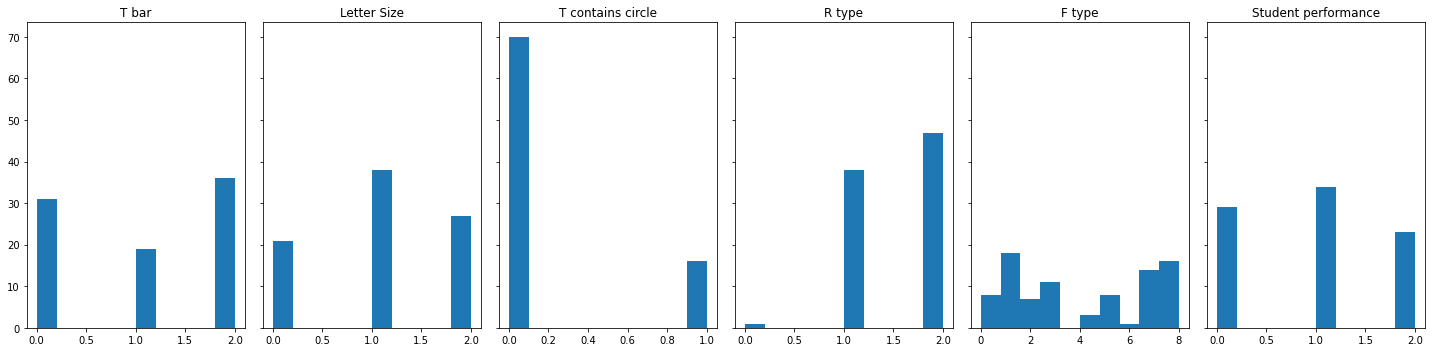

In [ ]:
# the distribution of different parameters
n_bins = 20

fig, axs = plt.subplots(1, 6, sharey=True, tight_layout=True, figsize=(20, 5))


axs[0].hist(data1_num["T bar height"])
axs[0].set_title('T bar')
axs[1].hist(data1_num["Letter Size"])
axs[1].set_title('Letter Size')
axs[2].hist(data1_num["T circle"])
axs[2].set_title('T contains circle')
axs[3].hist(data1_num["R type"])
axs[3].set_title('R type')
axs[4].hist(data1_num["F type"])
axs[4].set_title('F type')
axs[5].hist(data1_num["Student performance"])
axs[5].set_title("Student performance")

plt.show()

In [ ]:
# dropping the outliers from R_type
data1_num = data1_num[data1_num["R type"] != 0]

In [ ]:
corr = data1_num.corr()
corr.style.background_gradient()

,T bar height,T circle,R type,F type,Letter Size,Student performance
T bar height,1.000000,0.247876,-0.059478,-0.097314,0.266310,-0.150515
T circle,0.247876,1.000000,-0.172342,-0.055833,-0.119415,-0.143891
R type,-0.059478,-0.172342,1.000000,0.407365,0.039432,-0.034698
F type,-0.097314,-0.055833,0.407365,1.000000,-0.115644,-0.078189
Letter Size,0.266310,-0.119415,0.039432,-0.115644,1.000000,-0.012121
Student performance,-0.150515,-0.143891,-0.034698,-0.078189,-0.012121,1.000000


### Designing Models to Predict Student Performance (Train-Test regular splits)

In [ ]:
# creating a dataframe with features
features = data1_num.iloc[:,0:5]
# dropping T circle column which is imbalanced
features.drop("T circle", axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# all 4 characteristics together
X_train, X_test, y_train, y_test = train_test_split( features, data1_num["Student performance"], test_size=0.2, random_state=42)

# for using individual features for training replace "features" with 
# - features["T bar height"]
# - features["R type"]
# - features["F type"]
# - features["Letter Size"]


#### Random Forest Classifier

In [ ]:
n_estimators = [3,4,5,7, 8, 9]
criterion = ["gini", "entropy"]
RF_Results = []

for n in n_estimators:
  for c in criterion:

      RF_model = RandomForestClassifier(n_estimators=n,criterion=c,n_jobs = -1, random_state = 0,) 
      RF_model.fit(X_train, y_train)
      predictions = RF_model.predict(X_test)
      test_score = RF_model.score(X_test, y_test) #Return the mean accuracy on the given test data and labels.
      train_score = RF_model.score(X_train, y_train)
      RF_Results.append([n, c, test_score, train_score])



In [ ]:
RF_Results = pd.DataFrame(RF_Results)
RF_Results.columns = ["Number of Estimatoras", "Criterion", "Test data Accuracy score", "Train data Accuracy score"]
RF_Results

,Number of Estimatoras,Criterion,Test data Accuracy score,Train data Accuracy score
0,3,gini,0.235294,0.794118
1,3,entropy,0.235294,0.764706
2,4,gini,0.294118,0.764706
3,4,entropy,0.294118,0.779412
4,5,gini,0.176471,0.823529
5,5,entropy,0.176471,0.823529
6,7,gini,0.176471,0.823529
7,7,entropy,0.176471,0.838235
8,8,gini,0.235294,0.852941
9,8,entropy,0.176471,0.867647


overfits

#### KNN classifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# training accuracy
knn.score(X_train,y_train)

0.6825396825396826

In [ ]:
# testing accuracy
y_knn = knn.predict(X_test)
accuracy_score(y_knn, y_test)

0.13636363636363635

Model overfitted on train, and performs very bad on test

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_dt = dt.predict(X_test)
print( "Training accuracy ", dt.score(X_train, y_train), "Testing accuracy ", dt.score(X_test, y_test))

Training accuracy  0.8888888888888888 Testing accuracy  0.2727272727272727


overfitted

#### Logistic Regression with penalty for regularization

In [ ]:
from sklearn.linear_model import LogisticRegression
penalty =  "l2"
solver = ['newton-cg', 'lbfgs', 'liblinear']
Logistic_Results = []

for s in solver:
    Logistic_model = LogisticRegression(penalty = penalty, solver = s)
    Logistic_model.fit(X_train, y_train)
    predictions = Logistic_model.predict(X_test)
    tsscore = Logistic_model.score(X_test, y_test)
    trscore = Logistic_model.score(X_train, y_train)
    #f1 = metrics.f1_score(y_test, predictions)
    Logistic_Results.append([s, penalty, tsscore, trscore])


In [ ]:
Logistic_Results = pd.DataFrame(Logistic_Results)
Logistic_Results.columns = ["Solver", "Penalty","Test Accuracy", "Train Accuracy"]
Logistic_Results

,Solver,Penalty,Test Accuracy,Train Accuracy
0,newton-cg,l2,0.352941,0.397059
1,lbfgs,l2,0.352941,0.397059
2,liblinear,l2,0.294118,0.411765


all - 0.35


R type - 0.29

F type - 0.11

T bar height - 0.41

T bar height with R type - 0.35

Letter size - 0.29

Letter size + T bar - 0.29


tested on train, 0.42 acucracy


#### ROC and AUC for Logisitc Regression

In [ ]:
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
# Learn to predict each class against the other
lw = 3
random_state = np.random.RandomState(0)
n_samples, n_features = features.shape
n_classes = len(np.unique(data1_num["Student performance"]))

classifier = OneVsRestClassifier(
    LogisticRegression(penalty = "l2", solver = "saga", random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

y_test1 = []
for i in (y_test):
  if i == 0:
    y_test1.append([1,0,0])
  elif i == 1:
    y_test1.append([0,1,0])
  else:
    y_test1.append([0,0,1])

y_test1 = np.array(y_test1)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


<Figure size 432x288 with 0 Axes>

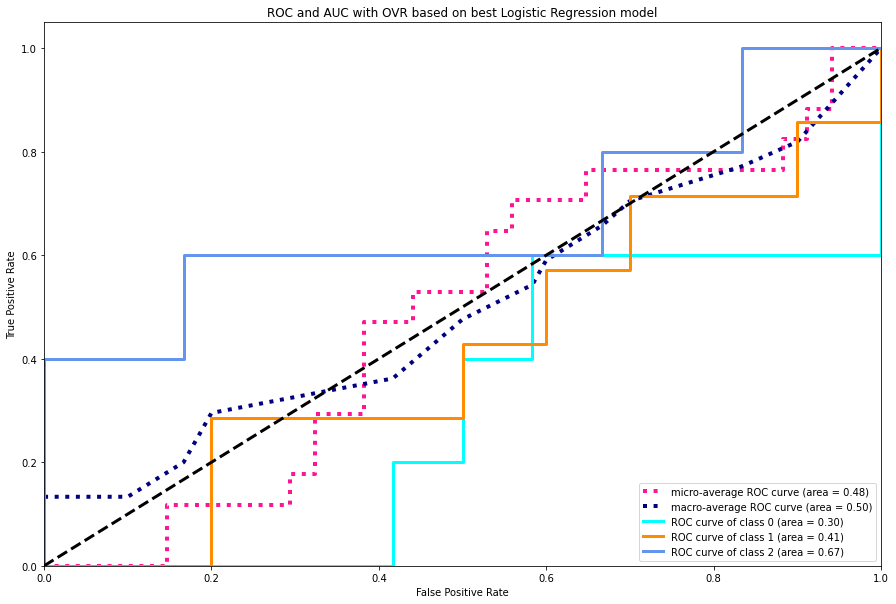

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.figure(figsize = (15,10))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC and AUC with OVR based on best Logistic Regression model")
plt.legend(loc="lower right")
plt.show()

#### SVC

In [ ]:
from sklearn.svm import SVC as SVC
SVC_model = SVC(kernel = "linear")
SVC_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
SVC_model.score(X_test, y_test)

0.29411764705882354

In [ ]:
SVC_model.score(X_train, y_train)

0.45588235294117646

SVC with T bar 0.41

SVC with all 0.29


Also 0.41 on R type

Letter size 0.29

#### ROC and AUC for SVC model

In [ ]:
# Learn to predict each class against the other
lw = 3
random_state = np.random.RandomState(0)
n_samples, n_features = features.shape
n_classes = len(np.unique(data1_num["Student performance"]))

classifier = OneVsRestClassifier(
    SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

y_test1 = []
for i in (y_test):
  if i == 0:
    y_test1.append([1,0,0])
  elif i == 1:
    y_test1.append([0,1,0])
  else:
    y_test1.append([0,0,1])

y_test1 = np.array(y_test1)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<Figure size 432x288 with 0 Axes>

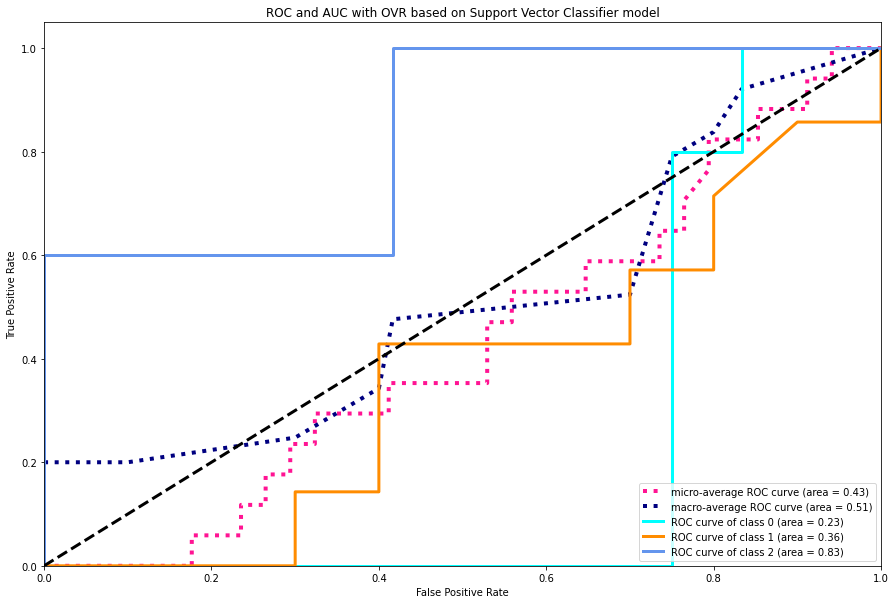

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.figure(figsize = (15,10))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC and AUC with OVR based on Support Vector Classifier model")
plt.legend(loc="lower right")
plt.show()

All features AUC - 0.83



T_bar height only - 0.5

#### Regularization with Ridge and Lasso

In [ ]:
# RIdge Regularization  (l2)
ridge = Ridge(alpha=.04)
ridge.fit(X_train,y_train)
p = ridge.predict(X_train)
p1 = ridge.predict(X_test)
print ("Ridge model:", (ridge.coef_))
print("Ridge Regression Model Training Score: ",ridge.score(X_train, y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))


Ridge model: [-0.08532349 -0.01363351 -0.03725157 -0.10817772]
Ridge Regression Model Training Score:  0.03989509355938847
Ridge Regression Model Testing Score:  -0.1074107529656354


In [ ]:
#Lasso Regularization (l1)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Lasso model: [-0.07482212 -0.         -0.03619175 -0.09278225]
Lasso Regression Model Training Score:  0.03935678233191886
Lasso Regression Model Testing Score:  -0.09335022715444374


MLP on T_bar Height provided 0.47 accuracy



With all the features together MLP landed 0.47 with more models also for r type

#### MLP

In [ ]:
hidden_layer_sizes = [2,(2,3),3,(3,4),5,(6,5),7,(8,2),9,(10,2),15,(20,2)]
max_iter = [10, 15, 50]
activation = ["relu", "tanh"]
solver = ["sgd", "adam"]

MLP_results = []

for layer in hidden_layer_sizes:
  for iter in max_iter:
    for act in activation:
      for s in solver:
          classifier = MLPClassifier(hidden_layer_sizes = layer,
                        max_iter = iter,
                        activation = act,
                        solver = s,
                        verbose = False,
                        early_stopping = False,
                        random_state = np.random.RandomState(13))
          classifier.fit(X_train, y_train)
          predicitons = classifier.predict(X_test)
          tsscore = np.round(metrics.accuracy_score(y_test, predicitons),4)
          predicitons1 = classifier.predict(X_train)
          trscore = np.round(metrics.accuracy_score(y_train, predicitons1),4)
          f1 = metrics.f1_score(y_test, predicitons,average='weighted')
          loss = classifier.loss_

          MLP_results.append([layer, iter, act, s, tsscore, trscore, f1, loss])
        

In [ ]:
MLP_results_df = pd.DataFrame(MLP_results)
MLP_results_df.columns =['Hidden Layer Sizes', 'Max Iter.', 'Activation', 'Solver', "TS Accuracy", "TR Accuracy","F1", "Loss"]
MLP_results_df.sort_values(by = ["TS Accuracy","TR Accuracy", "F1"], inplace = True, ascending = False)
MLP_results_df

In [ ]:
MLP_results_df[MLP_results_df["TS Accuracy"] == 0.6471]

,Hidden Layer Sizes,Max Iter.,Activation,Solver,TS Accuracy,TR Accuracy,F1,Loss
4,2,15,relu,sgd,0.6471,0.3529,0.563914,1.220389
56,5,50,relu,sgd,0.6471,0.3088,0.535755,1.276395


No overfitting here

#### MLP with batches

In [ ]:
def MLPperceptron1(train_x, train_y, test_X, test_y, num_neurons = 100):
  classifier = MLPClassifier(hidden_layer_sizes = 2, max_iter = 15, activation = "relu", solver = "sgd", verbose = False, early_stopping = False)
  a1 = classifier.fit(train_x, train_y)
  a2 = classifier.fit(test_X, test_y)

  predicitons = classifier.predict(test_X)
  score = np.round(metrics.accuracy_score(test_y, predicitons),2)
  train_loss = a1.loss_
  test_loss = a2.loss_
  return train_loss, test_loss


In [ ]:
def train1(X_train, y_train, X_test, y_test, model, batch_size=20, num_epoch=20):
    
    num_samples, num_features = X_train.shape
    num_batches = int(num_samples / batch_size)
    order = np.arange(num_samples)
    losslist = []
    i=0
    while i < num_epoch:
        np.random.shuffle(order)
        trainX = np.array_split(X_train, num_batches)
        trainY = np.array_split(y_train, num_batches)
        testX = np.array_split(X_test, num_batches)
        testY = np.array_split(y_test, num_batches)
        i = i+1
        loss = 0
        for j in range(num_batches):
          train_loss, test_loss = model(trainX[j],trainY[j], testX[j], testY[j])[0], model(trainX[j],trainY[j], testX[j], testY[j])[1]
          loss =  train_loss +test_loss

        losslist.append(loss)
    return range(num_epoch), losslist

 

In [ ]:
X1_p, Y1_p = train1(X_train, y_train, X_test, y_test, MLPperceptron1)

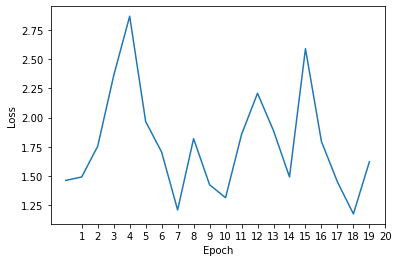

In [ ]:
plt.plot(X1_p, Y1_p)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks([i for i in range(1,21)])
plt.show()

### Designing Models to Predict Student Performance (Training on high and low classes, prediction on middle class, tested by professor)

In [ ]:
data_n = data1.copy()


#making categorical data columns numerical
data_n["T bar height"] = LabelEncoder().fit_transform(data_n["T bar height"])
data_n["T circle"] = LabelEncoder().fit_transform(data_n["T circle"])
data_n["R type"] = LabelEncoder().fit_transform(data_n["R type"])
data_n["F type"] = LabelEncoder().fit_transform(data_n["F type"])
data_n["Letter Size"] = LabelEncoder().fit_transform(data_n["Letter Size"])
data_n["Student performance"] = LabelEncoder().fit_transform(data_n["Student performance"])


# bringing all columns to the same datatype
for i in data_n:
 # if type(data_num[i][0]) == str:
#    data_num.drop(i, axis='columns', inplace = True)
  if type(data_n[i][0]) == np.float or type(data_n[i][0]) == np.int:
    data_n[i] = data_n[i].astype("int64")
  else:
    continue


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
data_n.sort_values(by = "ID", inplace = True)
data_n.head()

,ID,T bar height,T circle,R type,F type,Letter Size,Student performance
38,OOPMT170317H001,0,0,1,3,0,0
39,OOPMT170317H002,0,0,2,8,1,0
40,OOPMT170317H003,1,1,1,3,2,0
41,OOPMT170317H004,0,0,1,3,0,0
42,OOPMT170317H005,1,0,1,4,2,0


In [ ]:
# training
X_train = data_n[data_n["Student performance"] != 2]
X_train.drop(["Student performance", "T circle", "ID"], axis = 1, inplace = True)

y_train = data_n[data_n["Student performance"] != 2]
y_train = y_train["Student performance"]

X_test = data_n[data_n["Student performance"] == 2]
X_test.drop(["Student performance", "T circle"], axis = 1, inplace = True)

y_test = data_n[data_n["Student performance"] == 2]
y_test = y_test["Student performance"]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Prof_pred = pd.DataFrame()
Prof_pred["Student ID"] = X_test["ID"]
#Prof_pred["Predicted performance"] = []
#Prof_pred["Professor estimate"] = []
Prof_pred["Student ID"]


22    OOPMT170317M015
21    OOPMT170317M016
20    OOPMT170317M017
19    OOPMT170317M018
18    OOPMT170317M019
17    OOPMT170317M020
16    OOPMT170317M021
15    OOPMT170317M022
14    OOPMT170317M023
13    OOPMT170317M024
12    OOPMT170317M025
11    OOPMT170317M026
10    OOPMT170317M027
0     OOPMT170317M062
1     OOPMT170317M063
2     OOPMT170317M064
3     OOPMT170317M065
4     OOPMT170317M066
5     OOPMT170317M067
6     OOPMT170317M068
7     OOPMT170317M069
8     OOPMT170317M070
9     OOPMT170317M071
Name: Student ID, dtype: object

In [ ]:
X_test.drop("ID", axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# train the best MLP model to get the predictions
best_model = MLPClassifier(hidden_layer_sizes = 2,	max_iter = 15, activation =	"relu", solver =	"sgd", verbose = False, early_stopping = False, random_state = np.random.RandomState(13))
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)
pred

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [ ]:
best_model.predict(X_train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# 3rd stage
# Model design based on AUA, Introduction to Object-Oriented Programming Midterm and Final Exam (137 samples)

### Exploratory Data Analysis and Data Preprocessing

In [7]:
data1 = pd.read_csv("/content/Capstone dataset 3.csv")

In [8]:
data1

,ID,T bar height,T circle,R type,F type,Letter Size,baseline,slant,organized/ ordered/ jnjumner,readability,code indent,Student performance
0,OOPMT170317M062,low,False,typed,line_line_low,small,descending,left,False,normal,normal,M
1,OOPMT170317M063,high,False,hand,line_circle_middle,large,straight,vertical,False,normal,normal,M
2,OOPMT170317M064,low,False,hand,circle_line_low,middle,straight,right,False,hard,normal,M
3,OOPMT170317M065,middle,False,hand,circle_line_low,middle,ascending,left,True,easy,absent,M
4,OOPMT170317M066,low,False,hand,circle_circle_low,small,ascending,right,False,hard,absent,M
...,...,...,...,...,...,...,...,...,...,...,...,...
132,OOPMT1170215H098,low,True,hand,circle_circle_middle,middle,ascending,vertical,True,easy,normal,H
133,OOPMT1170215H099,high,False,typed,line_line_middle,small,descending,right,False,normal,normal,H
134,OOPMT1170215H100,high,False,hand,circle_circle_middle,large,descending,right,True,normal,normal,H
135,OOPMT1170215H101,high,True,typed,circle_line_middle,small,straight,vertical,True,easy,normal,H


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            137 non-null    object
 1   T bar height                  137 non-null    object
 2   T circle                      137 non-null    bool  
 3   R type                        137 non-null    object
 4   F type                        137 non-null    object
 5   Letter Size                   137 non-null    object
 6   baseline                      137 non-null    object
 7   slant                         137 non-null    object
 8   organized/ ordered/ jnjumner  137 non-null    bool  
 9   readability                   137 non-null    object
 10  code indent                   137 non-null    object
 11  Student performance           137 non-null    object
dtypes: bool(2), object(10)
memory usage: 11.1+ KB


In [10]:
data1.describe

<bound method NDFrame.describe of                    ID T bar height  T circle R type                F type  \
0     OOPMT170317M062          low     False  typed         line_line_low   
1     OOPMT170317M063         high     False   hand    line_circle_middle   
2     OOPMT170317M064          low     False   hand       circle_line_low   
3     OOPMT170317M065       middle     False   hand       circle_line_low   
4     OOPMT170317M066          low     False   hand     circle_circle_low   
..                ...          ...       ...    ...                   ...   
132  OOPMT1170215H098          low      True   hand  circle_circle_middle   
133  OOPMT1170215H099         high     False  typed      line_line_middle   
134  OOPMT1170215H100         high     False   hand  circle_circle_middle   
135  OOPMT1170215H101         high      True  typed    circle_line_middle   
136  OOPMT1170215H102       middle     False  typed  circle_circle_middle   

    Letter Size    baseline     slant  or

In [11]:
data1.columns

Index(['ID', 'T bar height', 'T circle', 'R type', 'F type', 'Letter Size',
       'baseline', 'slant', 'organized/ ordered/ jnjumner', 'readability',
       'code indent', 'Student performance'],
      dtype='object')

In [12]:
#making data numerical
data1_num = data1.copy()
data1_num["T bar height"] = LabelEncoder().fit_transform(data1_num["T bar height"])
data1_num["T circle"] = LabelEncoder().fit_transform(data1_num["T circle"])
data1_num["R type"] = LabelEncoder().fit_transform(data1_num["R type"])
data1_num["F type"] = LabelEncoder().fit_transform(data1_num["F type"])
data1_num["Letter Size"] = LabelEncoder().fit_transform(data1_num["Letter Size"])
data1_num["Student performance"] = LabelEncoder().fit_transform(data1_num["Student performance"])
data1_num["organized/ ordered/ jnjumner"] = LabelEncoder().fit_transform(data1_num["organized/ ordered/ jnjumner"])
data1_num["readability"] = LabelEncoder().fit_transform(data1_num["readability"])
data1_num["code indent"] = LabelEncoder().fit_transform(data1_num["code indent"])
data1_num["baseline"] = LabelEncoder().fit_transform(data1_num["baseline"])
data1_num["slant"] = LabelEncoder().fit_transform(data1_num["slant"])




In [13]:
data1_num.head()

,ID,T bar height,T circle,R type,F type,Letter Size,baseline,slant,organized/ ordered/ jnjumner,readability,code indent,Student performance
0,OOPMT170317M062,1,0,2,9,2,1,0,0,2,1,2
1,OOPMT170317M063,0,0,1,6,0,2,2,0,2,1,2
2,OOPMT170317M064,1,0,1,2,1,2,1,0,1,1,2
3,OOPMT170317M065,2,0,1,2,1,0,0,1,0,0,2
4,OOPMT170317M066,1,0,1,0,2,0,1,0,1,0,2


In [14]:
# dropping the ID column
data1_num.drop("ID", axis = 1, inplace = True)

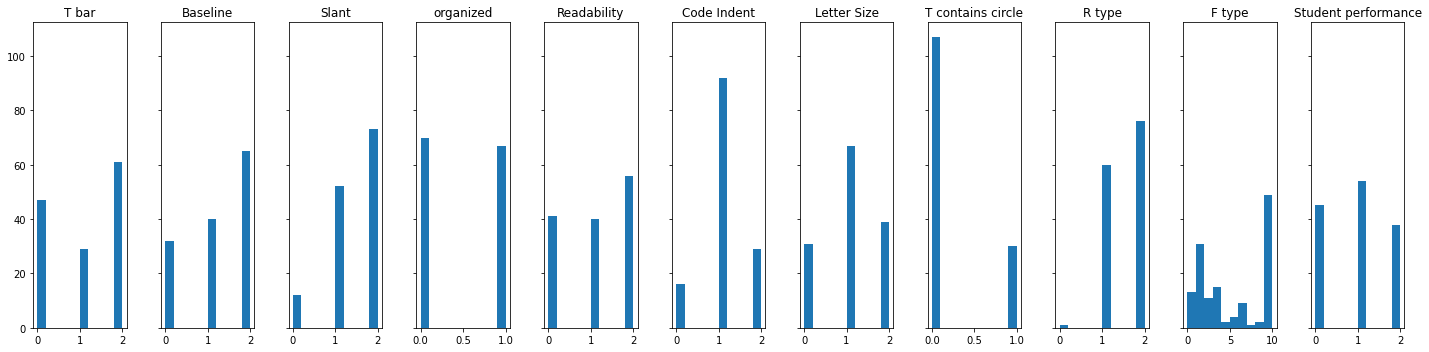

In [15]:
# the distribution of different parameters
n_bins = 20

fig, axs = plt.subplots(1, 11, sharey=True, tight_layout=True, figsize=(20, 5))


axs[0].hist(data1_num["T bar height"])
axs[0].set_title('T bar')
axs[1].hist(data1_num["baseline"])
axs[1].set_title('Baseline')
axs[2].hist(data1_num["slant"])
axs[2].set_title('Slant')
axs[3].hist(data1_num["organized/ ordered/ jnjumner"])
axs[3].set_title('organized')
axs[4].hist(data1_num["readability"])
axs[4].set_title('Readability')
axs[5].hist(data1_num["code indent"])
axs[5].set_title('Code Indent')
axs[6].hist(data1_num["Letter Size"])
axs[6].set_title('Letter Size')
axs[7].hist(data1_num["T circle"])
axs[7].set_title('T contains circle')
axs[8].hist(data1_num["R type"])
axs[8].set_title('R type')
axs[9].hist(data1_num["F type"])
axs[9].set_title('F type')
axs[10].hist(data1_num["Student performance"])
axs[10].set_title("Student performance")

plt.show()

In [16]:
data1.slant.unique()

array(['left', 'vertical', 'right'], dtype=object)

In [17]:
data1_num = data1_num.rename(columns={'organized/ ordered/ jnjumner': 'Organized', 'Student performance': 'Performance'})

In [18]:
# dropping the outliers from R_type
data1_num = data1_num[data1_num["R type"] != 0]

In [19]:
corr = data1_num.corr()
corr.style.background_gradient()

,T bar height,T circle,R type,F type,Letter Size,baseline,slant,Organized,readability,code indent,Performance
T bar height,1.000000,0.143428,0.045934,-0.020548,0.238624,-0.187133,0.002166,0.145001,-0.025353,0.025833,-0.002534
T circle,0.143428,1.000000,-0.241597,-0.181319,-0.013582,0.037719,0.151018,0.086617,-0.053919,0.129190,-0.142809
R type,0.045934,-0.241597,1.000000,0.440168,0.064374,0.046844,-0.047501,-0.055775,-0.052357,-0.006911,0.028127
F type,-0.020548,-0.181319,0.440168,1.000000,-0.053933,0.062380,0.028304,-0.127802,0.033619,0.034843,0.017413
Letter Size,0.238624,-0.013582,0.064374,-0.053933,1.000000,-0.098502,-0.081713,0.095323,0.151495,-0.012209,0.005504
baseline,-0.187133,0.037719,0.046844,0.062380,-0.098502,1.000000,0.086547,0.127045,-0.064274,0.013551,-0.118090
slant,0.002166,0.151018,-0.047501,0.028304,-0.081713,0.086547,1.000000,0.054171,0.011181,0.102927,-0.181057
Organized,0.145001,0.086617,-0.055775,-0.127802,0.095323,0.127045,0.054171,1.000000,-0.155007,-0.033947,-0.059240
readability,-0.025353,-0.053919,-0.052357,0.033619,0.151495,-0.064274,0.011181,-0.155007,1.000000,-0.039415,0.147734
code indent,0.025833,0.129190,-0.006911,0.034843,-0.012209,0.013551,0.102927,-0.033947,-0.039415,1.000000,-0.087651


### Designing Models to Predict Student Performance (Train-Test regular splits)

In [20]:
# creating a dataframe with features
features = data1_num.iloc[:,0:10]
# dropping T circle column which is imbalanced
features.drop("T circle", axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
# all 4 characteristics together
X_train, X_test, y_train, y_test = train_test_split( features[["readability", "baseline", "slant", "code indent"]], data1_num["Performance"], test_size=0.3, random_state=42)

# for using individual features for training replace "features" with 
# - features["feature name"]



#### Random Forest Classifier

In [22]:
n_estimators = [3,4,5,7, 8, 9, 10]
criterion = ["gini", "entropy"]
RF_Results = []

for n in n_estimators:
  for c in criterion:

      RF_model = RandomForestClassifier(n_estimators=n,criterion=c,n_jobs = -1, random_state = 0,) 
      RF_model.fit(X_train, y_train)
      predictions = RF_model.predict(X_test)
      test_score = RF_model.score(X_test, y_test) #Return the mean accuracy on the given test data and labels.
      train_score = RF_model.score(X_train, y_train)
      RF_Results.append([n, c, test_score, train_score])



In [23]:
RF_Results = pd.DataFrame(RF_Results)
RF_Results.columns = ["Number of Estimatoras", "Criterion", "Test data Accuracy score", "Train data Accuracy score"]
RF_Results

,Number of Estimatoras,Criterion,Test data Accuracy score,Train data Accuracy score
0,3,gini,0.390244,0.747368
1,3,entropy,0.341463,0.747368
2,4,gini,0.390244,0.757895
3,4,entropy,0.341463,0.757895
4,5,gini,0.414634,0.757895
5,5,entropy,0.341463,0.757895
6,7,gini,0.317073,0.747368
7,7,entropy,0.317073,0.747368
8,8,gini,0.268293,0.736842
9,8,entropy,0.268293,0.726316


very small accuracy score on test dataset, and normal score on train dataset

max accuracy 0.41 on test

#### KNN classifier

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

# training accuracy
knn.score(X_train,y_train)

0.6210526315789474

In [25]:
# testing accuracy
y_knn = knn.predict(X_test)
accuracy_score(y_knn, y_test)

0.3170731707317073

Model overfitted on train, and performs very bad on test

#### Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_dt = dt.predict(X_test)
print( "Training accuracy ", dt.score(X_train, y_train), "Testing accuracy ", dt.score(X_test, y_test))

Training accuracy  0.7684210526315789 Testing accuracy  0.2926829268292683


overfitted

#### Logistic Regression with penalty for regularization

In [27]:
from sklearn.linear_model import LogisticRegression
penalty =  "l2"
solver = ['newton-cg', 'lbfgs', 'liblinear']
Logistic_Results = []

for s in solver:
    Logistic_model = LogisticRegression(penalty = penalty, solver = s)
    Logistic_model.fit(X_train, y_train)
    predictions = Logistic_model.predict(X_test)
    tsscore = Logistic_model.score(X_test, y_test)
    trscore = Logistic_model.score(X_train, y_train)
    #f1 = metrics.f1_score(y_test, predictions)
    Logistic_Results.append([s, penalty, tsscore, trscore])


In [28]:
Logistic_Results = pd.DataFrame(Logistic_Results)
Logistic_Results.columns = ["Solver", "Penalty","Test Accuracy", "Train Accuracy"]
Logistic_Results

,Solver,Penalty,Test Accuracy,Train Accuracy
0,newton-cg,l2,0.292683,0.547368
1,lbfgs,l2,0.292683,0.547368
2,liblinear,l2,0.268293,0.526316


#### ROC and AUC for Logisitc Regression

In [29]:
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
# Learn to predict each class against the other
lw = 3
random_state = np.random.RandomState(0)
n_samples, n_features = features.shape
n_classes = len(np.unique(data1_num["Performance"]))

classifier = OneVsRestClassifier(
    LogisticRegression(penalty = "l2", solver = "saga", random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

y_test1 = []
for i in (y_test):
  if i == 0:
    y_test1.append([1,0,0])
  elif i == 1:
    y_test1.append([0,1,0])
  else:
    y_test1.append([0,0,1])

y_test1 = np.array(y_test1)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<Figure size 432x288 with 0 Axes>

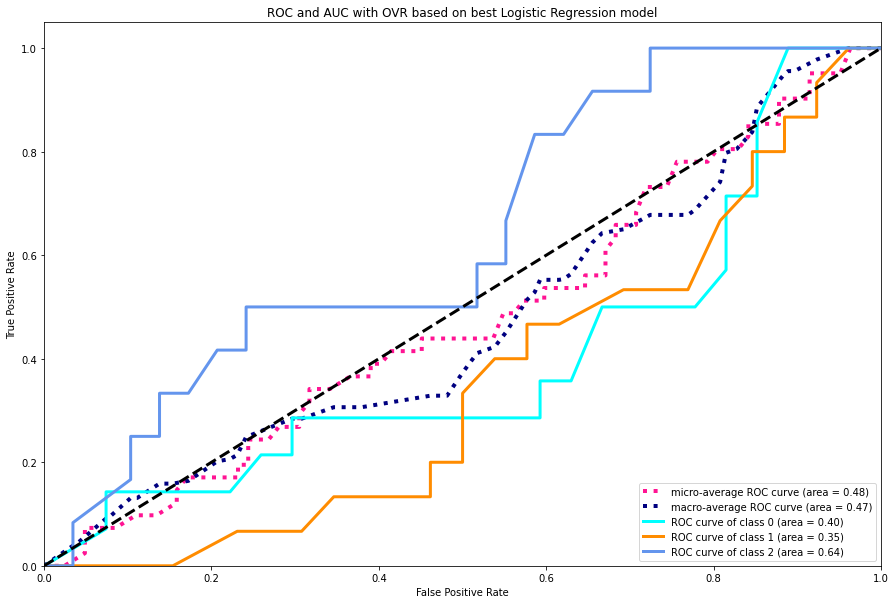

In [30]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.figure(figsize = (15,10))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC and AUC with OVR based on best Logistic Regression model")
plt.legend(loc="lower right")
plt.show()

#### SVC

In [31]:
from sklearn.svm import SVC as SVC
SVC_model = SVC(kernel = "linear")
SVC_model.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
SVC_model.score(X_test, y_test)

0.2682926829268293

In [33]:
SVC_model.score(X_train, y_train)

0.5052631578947369

#### ROC and AUC for SVC model

In [36]:
# Learn to predict each class against the other
lw = 3
random_state = np.random.RandomState(0)
n_samples, n_features = features.shape
n_classes = len(np.unique(data1_num["Performance"]))

classifier = OneVsRestClassifier(
    SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

y_test1 = []
for i in (y_test):
  if i == 0:
    y_test1.append([1,0,0])
  elif i == 1:
    y_test1.append([0,1,0])
  else:
    y_test1.append([0,0,1])

y_test1 = np.array(y_test1)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<Figure size 432x288 with 0 Axes>

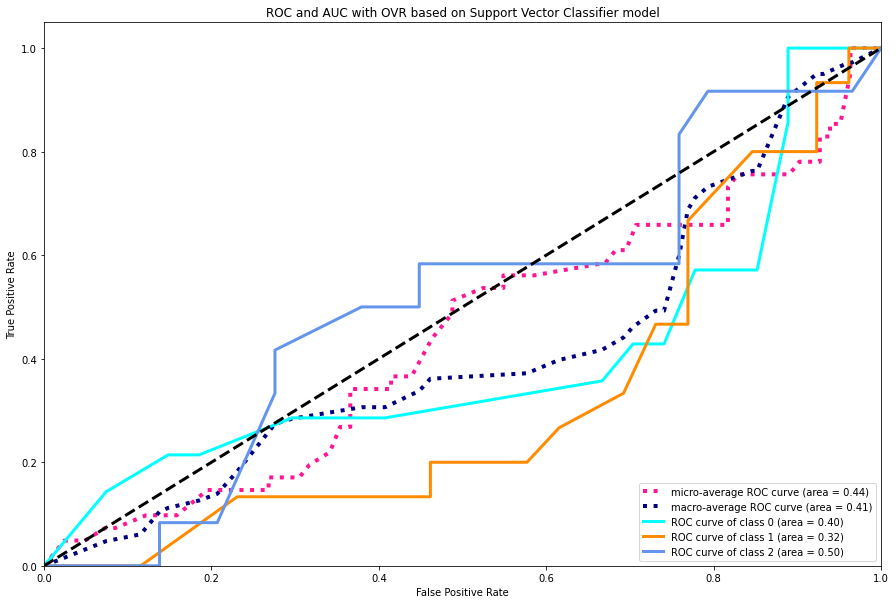

In [37]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.figure(figsize = (15,10))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC and AUC with OVR based on Support Vector Classifier model")
plt.legend(loc="lower right")
plt.show()

All features AUC - 0.83



T_bar height only - 0.5

#### Regularization with Ridge and Lasso

In [38]:
# RIdge Regularization  (l2)
ridge = Ridge(alpha=.04)
ridge.fit(X_train,y_train)
p = ridge.predict(X_train)
p1 = ridge.predict(X_test)
print ("Ridge model:", (ridge.coef_))
print("Ridge Regression Model Training Score: ",ridge.score(X_train, y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))


Ridge model: [ 0.20380298 -0.10803875 -0.28584505 -0.08821537]
Ridge Regression Model Training Score:  0.12916545849634598
Ridge Regression Model Testing Score:  -0.10435238617508236


In [39]:
#Lasso Regularization (l1)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Lasso model: [ 0.19045098 -0.09415836 -0.26428059 -0.06327251]
Lasso Regression Model Training Score:  0.12789694449607025
Lasso Regression Model Testing Score:  -0.08558450383256089


#### MLP

In [40]:
hidden_layer_sizes = [2,(2,3),3,(3,4),5,(6,5),7,(8,2),9,(10,2),15,(20,2)]
max_iter = [10, 15, 50]
activation = ["relu", "tanh"]
solver = ["sgd", "adam"]

MLP_results = []

for layer in hidden_layer_sizes:
  for iter in max_iter:
    for act in activation:
      for s in solver:
          classifier = MLPClassifier(hidden_layer_sizes = layer,
                        max_iter = iter,
                        activation = act,
                        solver = s,
                        verbose = False,
                        early_stopping = False,
                        random_state = np.random.RandomState(13))
          classifier.fit(X_train, y_train)
          predicitons = classifier.predict(X_test)
          tsscore = np.round(metrics.accuracy_score(y_test, predicitons),4)
          predicitons1 = classifier.predict(X_train)
          trscore = np.round(metrics.accuracy_score(y_train, predicitons1),4)
          f1 = metrics.f1_score(y_test, predicitons,average='weighted')
          loss = classifier.loss_

          MLP_results.append([layer, iter, act, s, tsscore, trscore, f1, loss])
        

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilaye

In [41]:
MLP_results_df = pd.DataFrame(MLP_results)
MLP_results_df.columns =['Hidden Layer Sizes', 'Max Iter.', 'Activation', 'Solver', "TS Accuracy", "TR Accuracy","F1", "Loss"]
MLP_results_df.sort_values(by = ["TS Accuracy","TR Accuracy", "F1"], inplace = True, ascending = False)
MLP_results_df

,Hidden Layer Sizes,Max Iter.,Activation,Solver,TS Accuracy,TR Accuracy,F1,Loss
75,7,10,tanh,adam,0.4146,0.3368,0.286950,1.216581
79,7,15,tanh,adam,0.4146,0.3368,0.286950,1.207273
82,7,50,tanh,sgd,0.4146,0.3368,0.286950,1.182073
83,7,50,tanh,adam,0.4146,0.3368,0.286950,1.157197
49,5,10,relu,adam,0.3902,0.4105,0.245064,1.638459
...,...,...,...,...,...,...,...,...
128,15,50,relu,sgd,0.2683,0.3579,0.261592,1.064315
35,3,50,tanh,adam,0.2683,0.2842,0.161123,1.628910
16,"(2, 3)",15,relu,sgd,0.2683,0.2632,0.123827,1.301994
20,"(2, 3)",50,relu,sgd,0.2683,0.2632,0.123827,1.271293


In [42]:
MLP_results_df[MLP_results_df["TS Accuracy"] == 0.6471]

,Hidden Layer Sizes,Max Iter.,Activation,Solver,TS Accuracy,TR Accuracy,F1,Loss


No overfitting here

#### MLP with batches

In [43]:
def MLPperceptron1(train_x, train_y, test_X, test_y, num_neurons = 100):
  classifier = MLPClassifier(hidden_layer_sizes = 7, max_iter = 10, activation = "tanh", solver = "adam", verbose = False, early_stopping = False)
  a1 = classifier.fit(train_x, train_y)
  a2 = classifier.fit(test_X, test_y)

  predicitons = classifier.predict(test_X)
  score = np.round(metrics.accuracy_score(test_y, predicitons),2)
  train_loss = a1.loss_
  test_loss = a2.loss_
  return train_loss, test_loss


In [44]:
def train1(X_train, y_train, X_test, y_test, model, batch_size=20, num_epoch=20):
    
    num_samples, num_features = X_train.shape
    num_batches = int(num_samples / batch_size)
    order = np.arange(num_samples)
    losslist = []
    i=0
    while i < num_epoch:
        np.random.shuffle(order)
        trainX = np.array_split(X_train, num_batches)
        trainY = np.array_split(y_train, num_batches)
        testX = np.array_split(X_test, num_batches)
        testY = np.array_split(y_test, num_batches)
        i = i+1
        loss = 0
        for j in range(num_batches):
          train_loss, test_loss = model(trainX[j],trainY[j], testX[j], testY[j])[0], model(trainX[j],trainY[j], testX[j], testY[j])[1]
          loss =  train_loss +test_loss

        losslist.append(loss)
    return range(num_epoch), losslist

 

In [ ]:
X1_p, Y1_p = train1(X_train, y_train, X_test, y_test, MLPperceptron1)

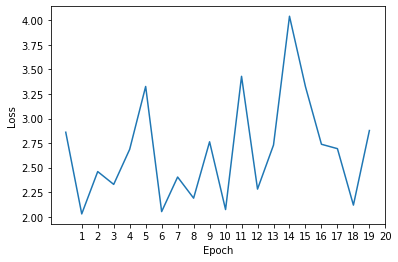

In [46]:
plt.plot(X1_p, Y1_p)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks([i for i in range(1,21)])
plt.show()

### Designing Models to Predict Student Performance (Training on high and low classes, prediction on middle class, tested by professor)

In [51]:
data1_n = data1.copy()
data1_n.head()

,ID,T bar height,T circle,R type,F type,Letter Size,baseline,slant,organized/ ordered/ jnjumner,readability,code indent,Student performance
0,OOPMT170317M062,low,False,typed,line_line_low,small,descending,left,False,normal,normal,M
1,OOPMT170317M063,high,False,hand,line_circle_middle,large,straight,vertical,False,normal,normal,M
2,OOPMT170317M064,low,False,hand,circle_line_low,middle,straight,right,False,hard,normal,M
3,OOPMT170317M065,middle,False,hand,circle_line_low,middle,ascending,left,True,easy,absent,M
4,OOPMT170317M066,low,False,hand,circle_circle_low,small,ascending,right,False,hard,absent,M


In [55]:
data1_n = data1.copy()


#making categorical data columns numerical

data1_n["T bar height"] = LabelEncoder().fit_transform(data1_n["T bar height"])
data1_n["T circle"] = LabelEncoder().fit_transform(data1_n["T circle"])
data1_n["R type"] = LabelEncoder().fit_transform(data1_n["R type"])
data1_n["F type"] = LabelEncoder().fit_transform(data1_n["F type"])
data1_n["Letter Size"] = LabelEncoder().fit_transform(data1_n["Letter Size"])
data1_n["Student performance"] = LabelEncoder().fit_transform(data1_n["Student performance"])
data1_n["organized/ ordered/ jnjumner"] = LabelEncoder().fit_transform(data1_n["organized/ ordered/ jnjumner"])
data1_n["readability"] = LabelEncoder().fit_transform(data1_n["readability"])
data1_n["code indent"] = LabelEncoder().fit_transform(data1_n["code indent"])
data1_n["baseline"] = LabelEncoder().fit_transform(data1_n["baseline"])
data1_n["slant"] = LabelEncoder().fit_transform(data1_n["slant"])


# bringing all columns to the same datatype
for i in data1_n:
 # if type(data_num[i][0]) == str:
#    data_num.drop(i, axis='columns', inplace = True)
  if type(data1_n[i][0]) == np.float or type(data1_n[i][0]) == np.int:
    data1_n[i] = data1_n[i].astype("int64")
  else:
    continue


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [56]:
data1_n.sort_values(by = "ID", inplace = True)
data1_n.head()

,ID,T bar height,T circle,R type,F type,Letter Size,baseline,slant,organized/ ordered/ jnjumner,readability,code indent,Student performance
121,OOPMT1170215H087,0,0,2,8,0,2,2,0,1,1,0
122,OOPMT1170215H088,2,0,2,10,1,2,2,0,0,1,0
123,OOPMT1170215H089,1,1,1,1,0,1,1,1,0,1,0
124,OOPMT1170215H090,2,1,1,2,1,2,2,1,0,1,0
125,OOPMT1170215H091,1,1,1,3,1,0,2,0,1,2,0


In [57]:
# training
#"readability", "baseline", "slant", "code indent"

X_train = data1_n[data1_n["Student performance"] != 2]
X_train.drop(["Student performance", "T circle", "ID", "R type", "F type", "Letter Size", "organized/ ordered/ jnjumner", "T bar height"], axis = 1, inplace = True)

y_train = data1_n[data1_n["Student performance"] != 2]
y_train = y_train["Student performance"]

X_test = data1_n[data1_n["Student performance"] == 2]
X_test.drop(["Student performance", "T circle", "R type", "F type", "Letter Size", "organized/ ordered/ jnjumner", "T bar height"], axis = 1, inplace = True)

y_test = data1_n[data1_n["Student performance"] == 2]
y_test = y_test["Student performance"]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:
Prof_pred = pd.DataFrame()
Prof_pred["Student ID"] = X_test["ID"]
#Prof_pred["Predicted performance"] = []
#Prof_pred["Professor estimate"] = []
Prof_pred["Student ID"]


106    OOPMT1170215M103
107    OOPMT1170215M104
108    OOPMT1170215M105
110    OOPMT1170215M107
111    OOPMT1170215M108
112    OOPMT1170215M109
113    OOPMT1170215M110
114    OOPMT1170215M111
115    OOPMT1170215M112
116    OOPMT1170215M113
117    OOPMT1170215M114
118    OOPMT1170215M115
119    OOPMT1170215M116
120    OOPMT1170215M117
22      OOPMT170317M015
21      OOPMT170317M016
20      OOPMT170317M017
19      OOPMT170317M018
18      OOPMT170317M019
17      OOPMT170317M020
16      OOPMT170317M021
15      OOPMT170317M022
14      OOPMT170317M023
13      OOPMT170317M024
12      OOPMT170317M025
11      OOPMT170317M026
10      OOPMT170317M027
0       OOPMT170317M062
1       OOPMT170317M063
2       OOPMT170317M064
3       OOPMT170317M065
4       OOPMT170317M066
5       OOPMT170317M067
6       OOPMT170317M068
7       OOPMT170317M069
8       OOPMT170317M070
9       OOPMT170317M071
109    OOPMT2240315M106
Name: Student ID, dtype: object

In [59]:
X_test.drop("ID", axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
# train the best MLP model to get the predictions
best_model = RandomForestClassifier(n_estimators=5,criterion="gini",n_jobs = -1, random_state = 0,) 
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)
pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [61]:
# predictions for the training dataset
hl_pred = best_model.predict(X_train)
hl_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
metrics.accuracy_score(hl_pred, y_train)

0.797979797979798

In [63]:
eval = [0,
1,
0,
0,
1,
0,
0,
1,
1,
1,
0,
0,
1,
1,
0,
0,
1,
1,
1,
0,
1,
0,
1,
1,
0,
0,
1,
1,
1,
0,
1,
1,
1,
0,
1,
1,
1,
0]

In [64]:
metrics.accuracy_score(eval,pred)

0.5263157894736842

In [65]:
df1 = {"student id": Prof_pred["Student ID"], "eval": eval, "pred": pred}
df1 = pd.DataFrame(df1)

In [66]:
df1

,student id,eval,pred
106,OOPMT1170215M103,0,1
107,OOPMT1170215M104,1,1
108,OOPMT1170215M105,0,0
110,OOPMT1170215M107,0,0
111,OOPMT1170215M108,1,0
112,OOPMT1170215M109,0,1
113,OOPMT1170215M110,0,0
114,OOPMT1170215M111,1,0
115,OOPMT1170215M112,1,0
116,OOPMT1170215M113,1,0


In [67]:
pred2 = [0,
1,
0,
0,
1,
0,
0,
0,
1,
0,
0,
0,
0,
1,
0,
0,
1,
0,
0,
0,
1,
0,
1,
1,
0,
0,
0,
0,
1,
0,
1,
1,
1,
0,
1,
0,
1,
0]

In [68]:
metrics.accuracy_score(eval,pred2)

0.7894736842105263